In [8]:
import pickle
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt

In [9]:
def get_scores_layers(model, layers, head):

    scores = np.zeros((layers, head))

    idx = 7
    for i in range(layers):
        for j in range(head):

            scores[i,j] = model[idx][-1]
            idx = idx + 1

    return scores

In [10]:
# BERT small
with open('../../_data/pascal-data/symmetry-scores/BERT-small-symmetry.pkl', 'rb') as file:
    models = pickle.load(file)

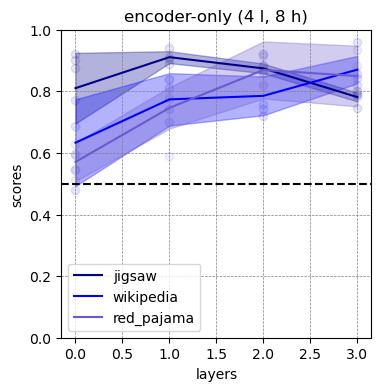

In [11]:
plt.figure(figsize=(4,4))

layers = 4
head = 4

name = 'bert-small-encoder-jigsaw'
c = 'darkblue'
scores = get_scores_layers(models[name], layers, head)

plt.plot(np.arange(layers),np.mean(scores,axis=1),color = c, label= 'jigsaw')
plt.fill_between(np.arange(layers),
                np.mean(scores,axis=1)+ iqr(scores,axis=1),
                np.mean(scores,axis=1)- iqr(scores,axis=1),
                color=c,alpha=.3)
for l in range(layers):
    plt.scatter(l * np.ones(head), scores[l,:], color = c, alpha=.1)

name = 'bert-small-encoder-wikipedia'
c = 'blue'
scores = get_scores_layers(models[name], layers, head)

plt.plot(np.arange(layers),np.mean(scores,axis=1),color = c, label= 'wikipedia')
plt.fill_between(np.arange(layers),
                np.mean(scores,axis=1)+ iqr(scores,axis=1),
                np.mean(scores,axis=1)- iqr(scores,axis=1),
                color=c,alpha=.3)
for l in range(layers):
    plt.scatter(l * np.ones(head), scores[l,:], color = c, alpha=.1)

name = 'bert-small-encoder-red_pajama'
c = 'slateblue'
scores = get_scores_layers(models[name], layers, head)

plt.plot(np.arange(layers),np.mean(scores,axis=1),color = c, label= 'red_pajama')
plt.fill_between(np.arange(layers),
                np.mean(scores,axis=1)+ iqr(scores,axis=1),
                np.mean(scores,axis=1)- iqr(scores,axis=1),
                color=c,alpha=.3)
for l in range(layers):
    plt.scatter(l * np.ones(head), scores[l,:], color = c, alpha=.1)


plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylabel('scores')
plt.xlabel('layers')
plt.title('encoder-only (4 l, 8 h)')
plt.ylim(0,1)
plt.legend()
plt.axhline(y=.5,color='k',linestyle='dashed')

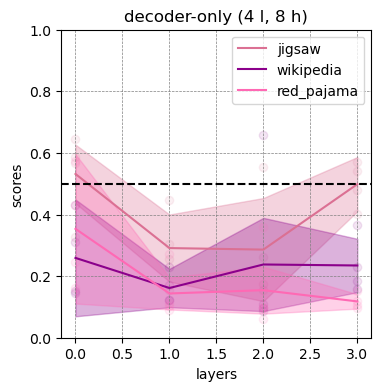

In [12]:
plt.figure(figsize=(4,4))

layers = 4
head = 4

name = 'bert-small-decoder-jigsaw'
c = 'palevioletred'
scores = get_scores_layers(models[name], layers, head)

plt.plot(np.arange(layers),np.mean(scores,axis=1),color = c, label= 'jigsaw')
plt.fill_between(np.arange(layers),
                np.mean(scores,axis=1)+ iqr(scores,axis=1),
                np.mean(scores,axis=1)- iqr(scores,axis=1),
                color=c,alpha=.3)
for l in range(layers):
    plt.scatter(l * np.ones(head), scores[l,:], color = c, alpha=.1)

name = 'bert-small-decoder-wikipedia'
c = 'darkmagenta'
scores = get_scores_layers(models[name], layers, head)

plt.plot(np.arange(layers),np.mean(scores,axis=1),color = c, label= 'wikipedia')
plt.fill_between(np.arange(layers),
                np.mean(scores,axis=1)+ iqr(scores,axis=1),
                np.mean(scores,axis=1)- iqr(scores,axis=1),
                color=c,alpha=.3)
for l in range(layers):
    plt.scatter(l * np.ones(head), scores[l,:], color = c, alpha=.1)

name = 'bert-small-decoder-red_pajama'
c = 'hotpink'
scores = get_scores_layers(models[name], layers, head)

plt.plot(np.arange(layers),np.mean(scores,axis=1),color = c, label= 'red_pajama')
plt.fill_between(np.arange(layers),
                np.mean(scores,axis=1)+ iqr(scores,axis=1),
                np.mean(scores,axis=1)- iqr(scores,axis=1),
                color=c,alpha=.3)
for l in range(layers):
    plt.scatter(l * np.ones(head), scores[l,:], color = c, alpha=.1)


plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylabel('scores')
plt.xlabel('layers')
plt.title('decoder-only (4 l, 8 h)')
plt.ylim(0,1)
plt.legend()
plt.axhline(y=.5,color='k',linestyle='dashed')